In [1]:
import numpy as np
from scipy import optimize
from sim.cartpole import CartPoleEnv
from agents.sin_agent import SinAgent
import csv
from pyswarms.single.global_best import GlobalBestPSO
from matplotlib import pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
from util.io import read_data

In [3]:
solution_states, actions = read_data('pendel.csv')
solution_states = np.array(solution_states)
actions = np.array(actions)
print(solution_states.shape, actions.shape)

(674, 4) (674,)


In [104]:
def fun2(theta, render=False):
    env = CartPoleEnv(swingup=True, solver='RK23')
    env.mu_pole = theta[0]
    #env.masscart = 10.0
    env.mu_cart = 0.3
    env.length = theta[1]
    env.masspole = theta[2]
    env.reset()
    env.state = solution_states[0]
    env.state[2] = np.pi/180
    env.state[3] = 0.2
        
    states = []
    if render:
        env.render()
    for i in range(len(actions)):
        states += [env.step([0])[0]]
        if render:
            env.render()
    env.close()
    return np.array(states)

In [54]:
def loss2_(theta):
    states = fun2(theta)
    delta_phi = (solution_states[:,2] - states[:,2]) % (2 * np.pi)
    delta_phi = np.minimum(delta_phi, 2*np.pi - delta_phi)**2
    return  delta_phi #+ (solution_states[:,0] - states[:,0])**2

def loss2(theta):
    losses = []
    for t in theta:
        losses += [np.sum(loss2_(t))]
    return losses


In [106]:
bounds = ([0.00001, 0.13, 0.035], 
          [0.1, 0.16, 0.06])
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
optimizer = GlobalBestPSO(n_particles=10, dimensions=3, options=options, bounds=bounds)
cost, pos = optimizer.optimize(loss2, 20)

2020-04-02 15:46:13,115 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|20/20, best_cost=245
2020-04-02 15:47:26,465 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 244.64176711231036, best pos: [0.00097941 0.14814924 0.04671245]


/Users/bastian/miniconda3/envs/ml/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/Users/bastian/miniconda3/envs/ml/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


81.58462146107009


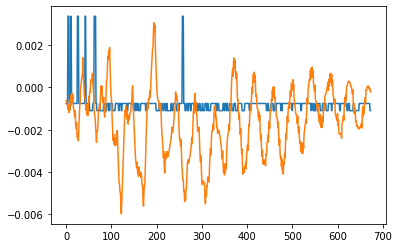

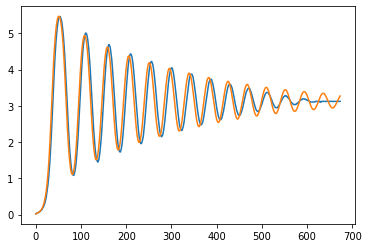

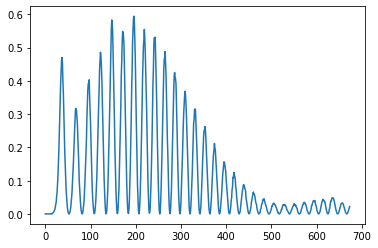

In [105]:
pos2 = [0.0003, 0.13, 0.05]
states = fun2(pos2)
plt.figure()
plt.plot(solution_states[:,0])
plt.plot(states[:,0])
plt.figure()
plt.plot(np.where(solution_states[:,2] < 0, solution_states[:,2] + 2*np.pi, solution_states[:,2]))
plt.plot(np.where(states[:,2] < 0, states[:,2] + 2*np.pi, states[:,2]))
plt.figure()
plt.plot(loss2_(pos2))
print(np.sum(loss2_(pos2)))

In [109]:
optimize.least_squares(loss2_, pos2, bounds=bounds)

 active_mask: array([ 0, -1,  0])
        cost: 12.590451498367148
         fun: array([1.12942197e-05, 8.70524684e-05, 1.76179356e-05, 3.45805679e-06,
       7.80044130e-05, 7.57323603e-06, 3.95401394e-05, 2.33782951e-05,
       4.53410470e-05, 5.42128633e-06, 1.54508501e-04, 4.89865372e-05,
       7.98492225e-05, 7.93606279e-05, 1.19142340e-03, 5.91141874e-04,
       1.66721658e-03, 3.56726173e-03, 4.48201519e-03, 6.54447924e-03,
       9.97219097e-03, 1.31872290e-02, 1.89251889e-02, 2.86795471e-02,
       3.35365965e-02, 5.15367986e-02, 6.28966990e-02, 8.68547099e-02,
       1.14617548e-01, 1.49117039e-01, 1.91937159e-01, 2.43556961e-01,
       2.86357267e-01, 3.51070957e-01, 3.94420051e-01, 4.26351708e-01,
       4.60848802e-01, 4.70303085e-01, 4.52486913e-01, 3.95977739e-01,
       3.60710117e-01, 3.03687172e-01, 2.45970002e-01, 1.88637305e-01,
       1.47796446e-01, 1.07964197e-01, 7.36264168e-02, 5.13025048e-02,
       3.34589478e-02, 1.83165782e-02, 7.93770662e-03, 2.15277131e-